# Центральная предельная теорема своими руками

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## Гамма-распределение

__Определение__. Пусть функция распределения случайной величины $\xi$ задается плотностью вероятности, имеющей вид  $$f_{\xi}(x) = \frac{x^{\alpha - 1} \lambda^{\alpha} e^{-\lambda x}}{\Gamma(\alpha)} I(x > 0), $$ где интеграл $ \Gamma(\alpha) = \int_{0}^{+\infty} x^{\alpha - 1} e^{-x} dx $ называется гамма-функцией. Тогда говорят, что случайная величина $\xi$ имеет гамма-распределение с параметрами $\alpha$ и $\lambda$.

Математическое ожидание такой случайной величины $\xi$ равно $E\xi = \frac{\alpha}{\lambda}$, а дисперсия равна $D\xi = \frac{\alpha}{\lambda^{2}}$.

Сгенерируем выборку из гамма-распределения c параметрами (3, 0.5) размера 1000, построим гистограмму выборки и нарисуем поверх нее теоретическую плотность распределения так распределенной случайной величины. 

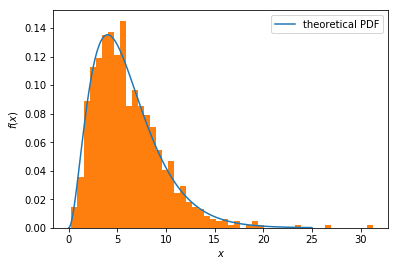

In [242]:
#зададим необходимую случайную величину 
gamma_rv = sts.gamma(3., loc = 0., scale = 2.)

#сгенерируем выборку
sample = gamma_rv.rvs(1000)

#построим гистограмму выборки и теоретическую плотность случайной величины
x = np.linspace(0, 25, 1000)
pdf = gamma_rv.pdf(x)

plt.plot(x, pdf, label = 'theoretical PDF')
plt.hist(sample, bins = 50, density = True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc = 'upper right')

В качестве параметра $\alpha$ для распределения выступает первый аргумент функции ```gamma()```, то есть $\alpha = 3.0$, при этом $\lambda = \frac{1}{scale} = 0.5$. Заранее рассчитаем значение математическое ожидание и дисперсию заданной случайной величины, так как это будет необходимо для изложенных ниже расчетов:
$$ E\xi = \frac{\alpha}{\lambda} = 6, \\ D\xi = \frac{\alpha}{\lambda^2} = 24. $$

## Оценка распределения выборочного среднего случайной величины при разных объемах выборок

Обозначим за $n$ объем выборки и будем оценивать распределения выборочного среднего для различных $n$, при этом для каждого $n$ будем генерировать 1000 выборок такого объема.

### n = 5

In [243]:
#зададим необходимую случайную величину 
gamma_rv = sts.gamma(3., loc = 0., scale = 2.)

#создадим массив для выборочных средних и сгенерируем выборки
n = 5
sample_means = np.array([])
samples_number = 1000

for i in range(0, samples_number):
    sample_i = gamma_rv.rvs(n) #генерация выборки
    sample_mean_i = sum(sample_i) / n #подсчет выборочного среднего
    sample_means = np.append(sample_means, sample_mean_i) #добавление вычислесленного выборочного среднего в массив

Рассчитаем значение параметров нормального распределения, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

In [244]:
E = 6.
D = 24.

variance = D / n #дисперсия нормального распределения, приближающего распределение выборочных средних
sd = math.sqrt(variance) #sd (standart deviation) - среднеквадратическое отклонение
norm_rv = sts.norm(E, sd) #задаем нормально распределенную случайную величину с рассчитанными параметрами

x = np.linspace(0, 12, 1000)
pdf = norm_rv.pdf(x) #получаем плотность распределения

Построим гистограмму по массиву выборочных средних и полученную плотность распределения случайной величины, приближающей распределение выборочных средних.

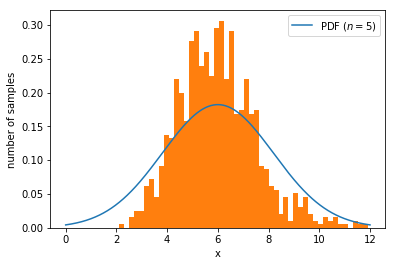

In [245]:
plt.plot(x, pdf, label = 'PDF ($n = 5$)')
plt.hist(sample_means, bins = 50, density = True)
plt.ylabel('number of samples')
plt.xlabel('x')
plt.legend(loc = 'upper right')

### n = 10

In [246]:
#зададим необходимую случайную величину 
gamma_rv = sts.gamma(3., loc = 0., scale = 2.)

#создадим массив для выборочных средних и сгенерируем выборки
n = 10
sample_means = np.array([])
samples_number = 1000

for i in range(0, samples_number):
    sample_i = gamma_rv.rvs(n) #генерация выборки
    sample_mean_i = sum(sample_i) / n #подсчет выборочного среднего
    sample_means = np.append(sample_means, sample_mean_i) #добавление вычислесленного выборочного среднего в массив

Рассчитаем значение параметров нормального распределения, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

In [247]:
E = 6.
D = 24.

variance = D / n #дисперсия нормального распределения, приближающего распределение выборочных средних
sd = math.sqrt(variance) #sd (standart deviation) - среднеквадратическое отклонение
norm_rv = sts.norm(E, sd) #задаем нормально распределенную случайную величину с рассчитанными параметрами
pdf = norm_rv.pdf(x) #получаем плотность распределения

Построим гистограмму по массиву выборочных средних и полученную плотность распределения случайной величины, 
приближающей распределение выборочных средних.

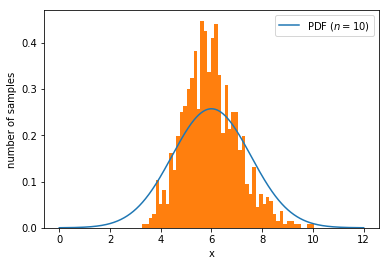

In [248]:
plt.plot(x, pdf, label = 'PDF ($n = 10$)')
plt.hist(sample_means, bins = 50, density = True)
plt.ylabel('number of samples')
plt.xlabel('x')
plt.legend(loc = 'upper right')

### n = 50

In [249]:
#зададим необходимую случайную величину 
gamma_rv = sts.gamma(3., loc = 0., scale = 2.)

#создадим массив для выборочных средних и сгенерируем выборки
n = 50
sample_means = np.array([])
samples_number = 1000

for i in range(0, samples_number):
    sample_i = gamma_rv.rvs(n) #генерация выборки
    sample_mean_i = sum(sample_i) / n #подсчет выборочного среднего
    sample_means = np.append(sample_means, sample_mean_i) #добавление вычислесленного выборочного среднего в массив

Рассчитаем значение параметров нормального распределения, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

In [250]:
E = 6.
D = 24.

variance = D / n #дисперсия нормального распределения, приближающего распределение выборочных средних
sd = math.sqrt(variance) #sd (standart deviation) - среднеквадратическое отклонение
norm_rv = sts.norm(E, sd) #задаем нормально распределенную случайную величину с рассчитанными параметрами
pdf = norm_rv.pdf(x) #получаем плотность распределения

Построим гистограмму по массиву выборочных средних и полученную плотность распределения случайной величины, приближающей распределение выборочных средних.

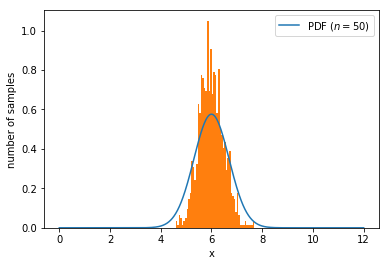

In [251]:
plt.plot(x, pdf, label = 'PDF ($n = 50$)')
plt.hist(sample_means, bins = 50, density = True)
plt.ylabel('number of samples')
plt.xlabel('x')
plt.legend(loc = 'upper right')

### n = 200

In [252]:
#зададим необходимую случайную величину 
gamma_rv = sts.gamma(3., loc = 0., scale = 2.)

#создадим массив для выборочных средних и сгенерируем выборки
n = 200
sample_means = np.array([])
samples_number = 1000

for i in range(0, samples_number):
    sample_i = gamma_rv.rvs(n) #генерация выборки
    sample_mean_i = sum(sample_i) / n #подсчет выборочного среднего
    sample_means = np.append(sample_means, sample_mean_i) #добавление вычислесленного выборочного среднего в массив

Рассчитаем значение параметров нормального распределения, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

In [253]:
E = 6.
D = 24.

variance = D / n #дисперсия нормального распределения, приближающего распределение выборочных средних
sd = math.sqrt(variance) #sd (standart deviation) - среднеквадратическое отклонение
norm_rv = sts.norm(E, sd) #задаем нормально распределенную случайную величину с рассчитанными параметрами
pdf = norm_rv.pdf(x) #получаем плотность распределения

Построим гистограмму по массиву выборочных средних и полученную плотность распределения случайной величины, приближающей распределение выборочных средних.

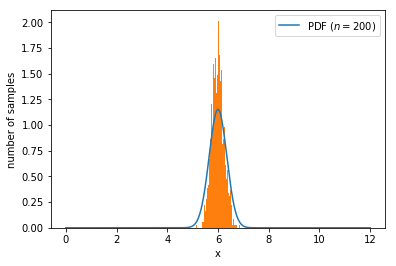

In [254]:
plt.plot(x, pdf, label = 'PDF ($n = 200$)')
plt.hist(sample_means, bins = 50, density = True)
plt.ylabel('number of samples')
plt.xlabel('x')
plt.legend(loc = 'upper right')

## Выводы

В работе использовалось гамма-распределение с параметрами $\alpha = 3.0$ и $\lambda = 0.5$. В ходе работы были сгенерированы 1000 выборок различного объема $n$ (5, 10, 50, 200), рассчитаны их выборочные средние, построены гистограммы их распределения. Для каждого значения $n$ были рассчитаны значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних и были построены соответствующие плотности распределения поверх каждой из гистограмм.

Исходя из полученных результатов, можно отметить, что с увеличением объема выборки распределение становилось все более гладким и по форме все больше напоминало нормальное с некоторыми параметрами. Также исходя из графиков и гистограмм, можно отметить, что с ростом объема выборки точность аппроксимации растет (на меньших значениях $n$ это не так заметно, но при значительном увеличении объема выборки увеличение точности становится намного заметнее).  